In [1]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import scipy


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
f_0 = 2e6
sampling_rate = 40*f_0
t = np.arange(0,2000/f_0,1/sampling_rate)
v_fluid = .8
print(v_fluid/1540*f_0)
f_d = f_0 * (1 + v_fluid/1500)
master_osc = np.sin(2*np.pi*f_0*t)
master_osc_shifted = np.sin(2*np.pi*f_0*t+np.pi/2)

phase_shift = 0
input_signal = np.sin(2*np.pi*f_d*t+phase_shift)

mixed_I = input_signal*master_osc
mixed_Q = input_signal*master_osc_shifted


1038.9610389610389


(0.0, 5e-07)

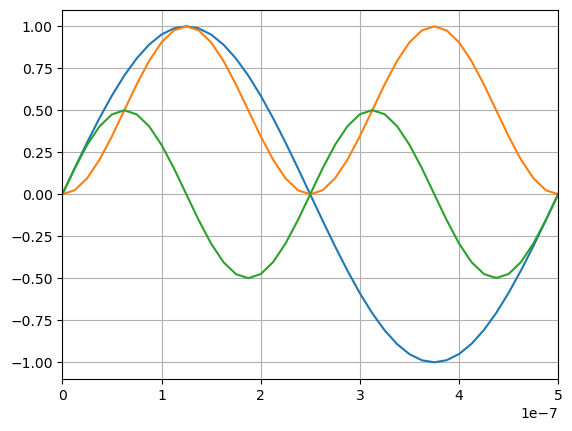

In [3]:
plt.plot(t,input_signal)
plt.plot(t,mixed_I)
plt.plot(t,mixed_Q)
#plt.plot(t,mixed_I**2+mixed_Q**2)
plt.grid()
plt.xlim((0,1/f_0))

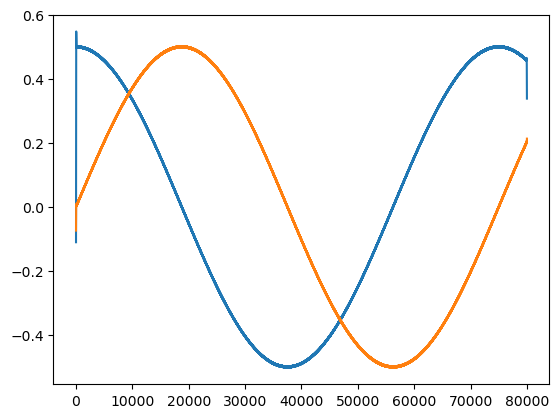

In [15]:
N=2
f_cuttoff = 1e6
Wn = f_cuttoff/(sampling_rate/2)

b, a = scipy.signal.butter(N, Wn, 'low')

output_signal_I = scipy.signal.filtfilt(b, a, mixed_I)
output_signal_Q = scipy.signal.filtfilt(b, a, mixed_Q)

plt.plot(output_signal_I)
plt.plot(output_signal_Q)

array([1.53360084e-05, 3.06720167e-05, 1.53360084e-05])